 ## <center>Predicting Heart Diseases</center>

#### Features:
1. age - age in years
2. sex - sex (1 = male; 0 = female)
3. cp - chest pain type(0: Typical angina; 1: Atypical angina; 2: Non-anginal pain; 3: Asymptomatic)
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestoral in mg/dl
6. fbs - (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
7. restecg - resting electrocardiographic results
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - null = 0, fixed defect = 1, normal = 2, reversable defect = 3
14. target - heart disease (1 = presence; 0 = no presence)

In [33]:
!pip install nbconvert
!pip install -U notebook-as-pdf
!pyppeteer-install
!pip install sweetviz
!pip install plotly
import nbconvert
import sweetviz as sv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np, scipy.stats as st
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
import warnings
import graphviz
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

[W:pyppeteer.command] chromium is already installed.


In [34]:
df = pd.read_csv('heart.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [36]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [37]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:xlabel='age', ylabel='Count'>

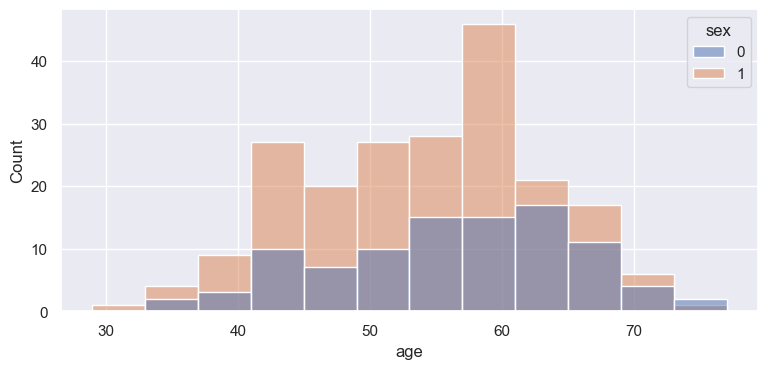

In [38]:
plt.figure(figsize=(9,4))
sns.histplot(data=df, x="age", hue="sex")

<AxesSubplot:xlabel='cp', ylabel='count'>

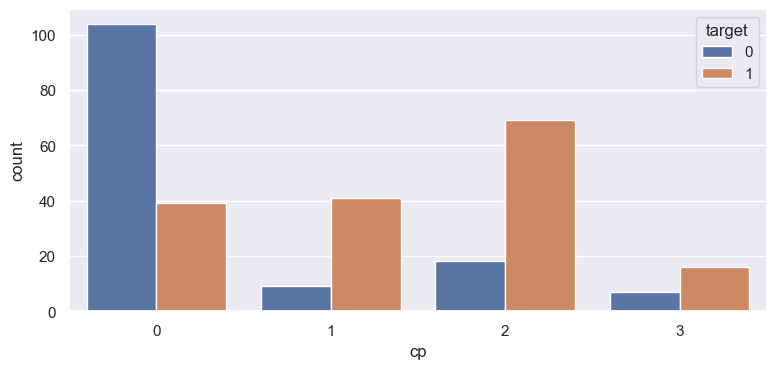

In [39]:
plt.figure(figsize=(9,4))
sns.countplot(df['cp'],hue=df["target"])

In [40]:
report = sv.analyze(df)

report.show_html('Heart Disease.html')


                                             |                                             | [  0%]   00:00 ->…

Report Heart Disease.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


plt.figure(figsize=(5,3))
sns.countplot(x='sex',hue='target',data=df,palette='Set1')

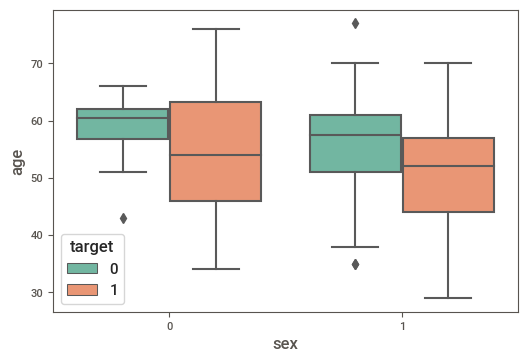

In [41]:
ax = sns.boxplot(x= df["sex"], y=df["age"],hue=df["target"],
                 data=df, palette="Set2")

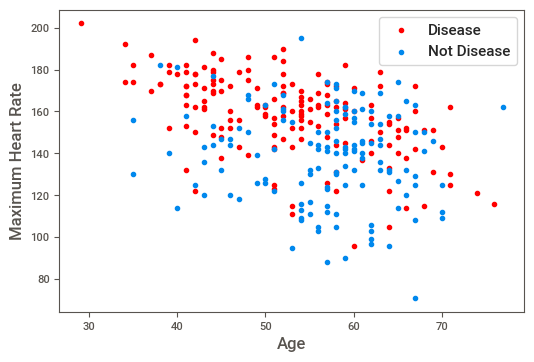

In [42]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

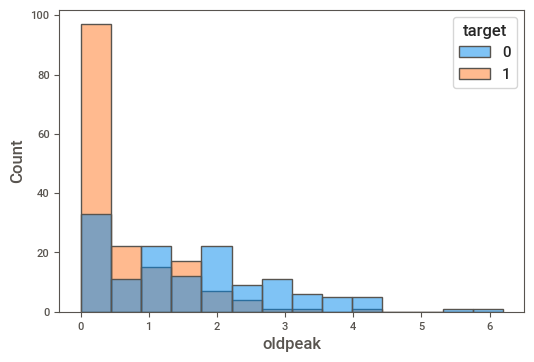

In [43]:

sns.histplot(data=df, x="oldpeak", hue="target")


<AxesSubplot:xlabel='age', ylabel='Count'>

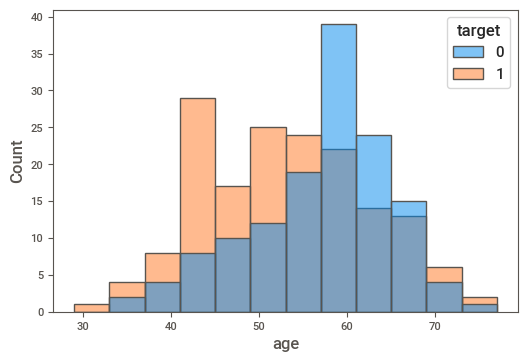

In [44]:
sns.histplot(data=df, x="age", hue="target")

<AxesSubplot:xlabel='sex', ylabel='count'>

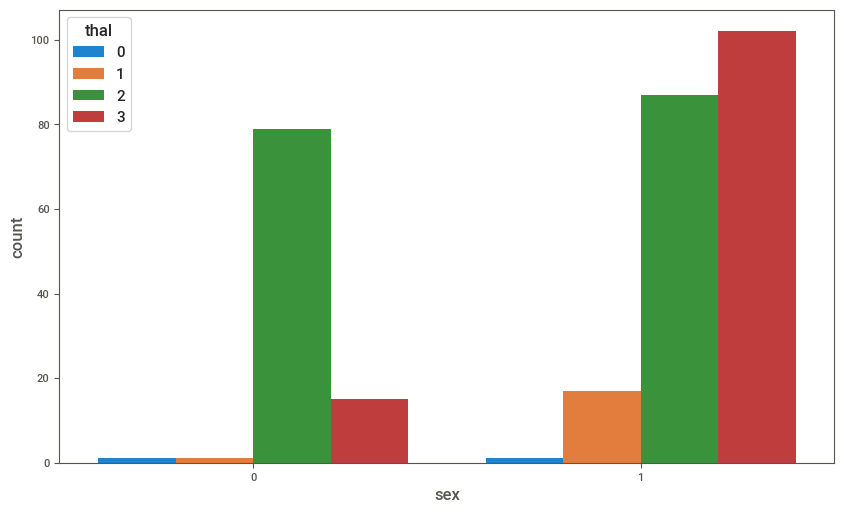

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(data= df, x='sex',hue='thal')
# plt.title('Gender v/s Thalassemia\n')



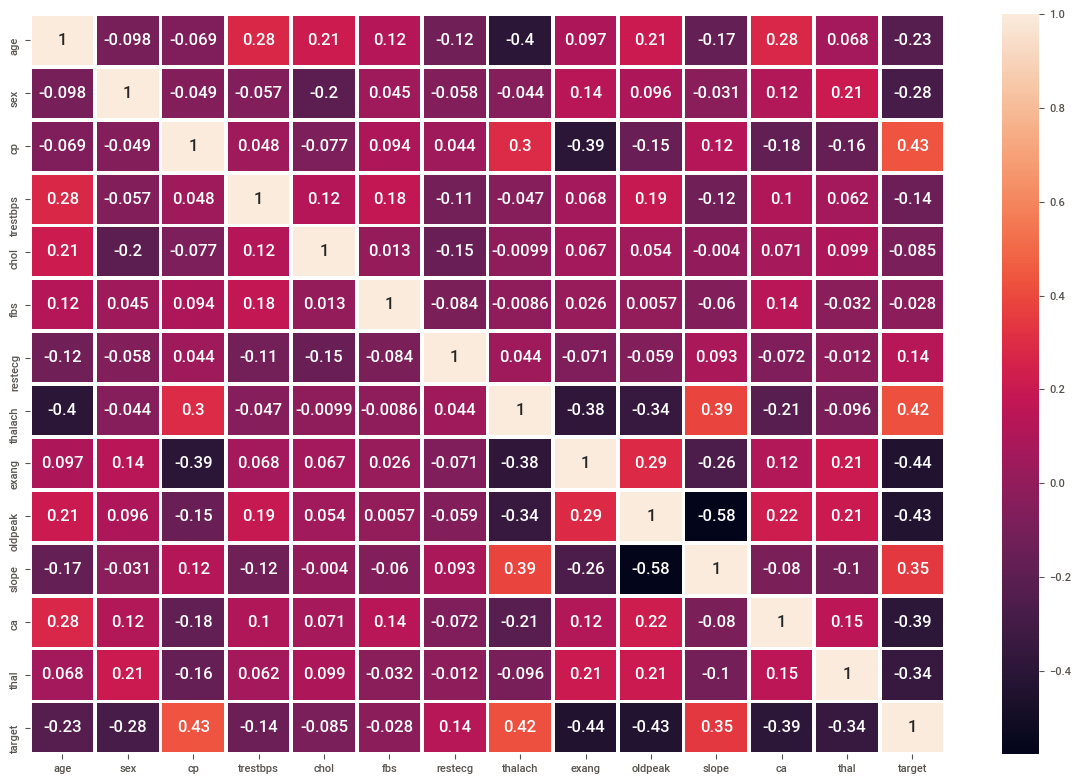

In [46]:


plt.figure(figsize=(12,8))

sns.heatmap(df.corr(),annot=True,linewidth =2)
plt.tight_layout()


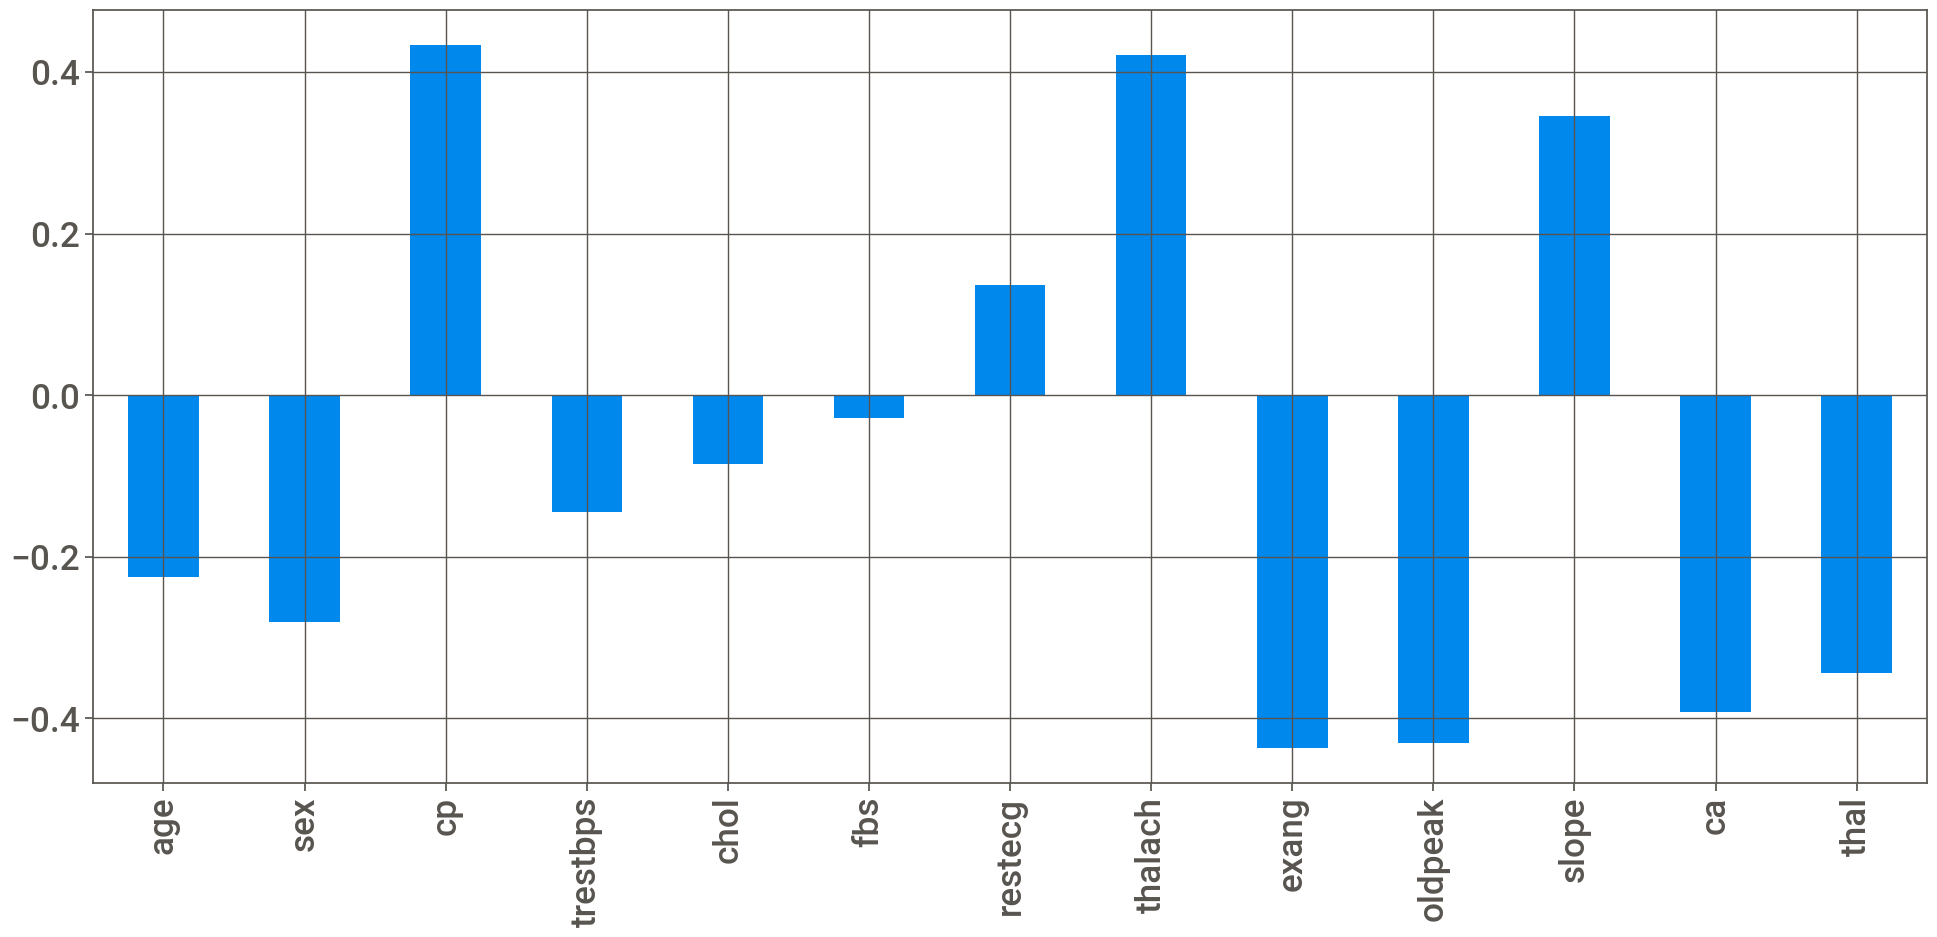

In [47]:

sns.set_context('notebook',font_scale = 2.3)
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(20, 10))
plt.tight_layout()


# Feature Engineering

In [48]:
categorical_val = []
continous_val = []
for column in df.columns:
    print("--------------------")
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

--------------------
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
--------------------
sex : [1 0]
--------------------
cp : [3 2 1 0]
--------------------
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
--------------------
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 34

# Modelling

In [49]:
y = df["target"]
X = df.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model_lgr = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confusion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,lr_predict))

confusion matrix
[[21  6]
 [ 3 31]]
-------------------------------------------
Accuracy of Logistic Regression: 85.24590163934425 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



1. accuracy: (tp + tn)/(tp + tn + fp + fn) 
2. precision: tp/(tp + fp)
3. recall: tp/(tp + fn)
4. f1-score: 2\*precision*recall/(precision + recall)

# KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confusion matrix")
print(knn_conf_matrix)
print("-------------------------------------------")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,knn_predicted))

confusion matrix
[[24  3]
 [ 4 30]]
-------------------------------------------
Accuracy of K-NeighborsClassifier: 88.52459016393442 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



1. accuracy: (tp + tn)/(tp + tn + fp + fn) 
2. precision: tp/(tp + fp)
3. recall: tp/(tp + fn)
4. f1-score: 2\*precision*recall/(precision + recall)

In [53]:
# Hyperparameter Optimization

test_score = []
neighbors = range(1, 25)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    test_score.append(accuracy_score(y_test, model.predict(X_test)))

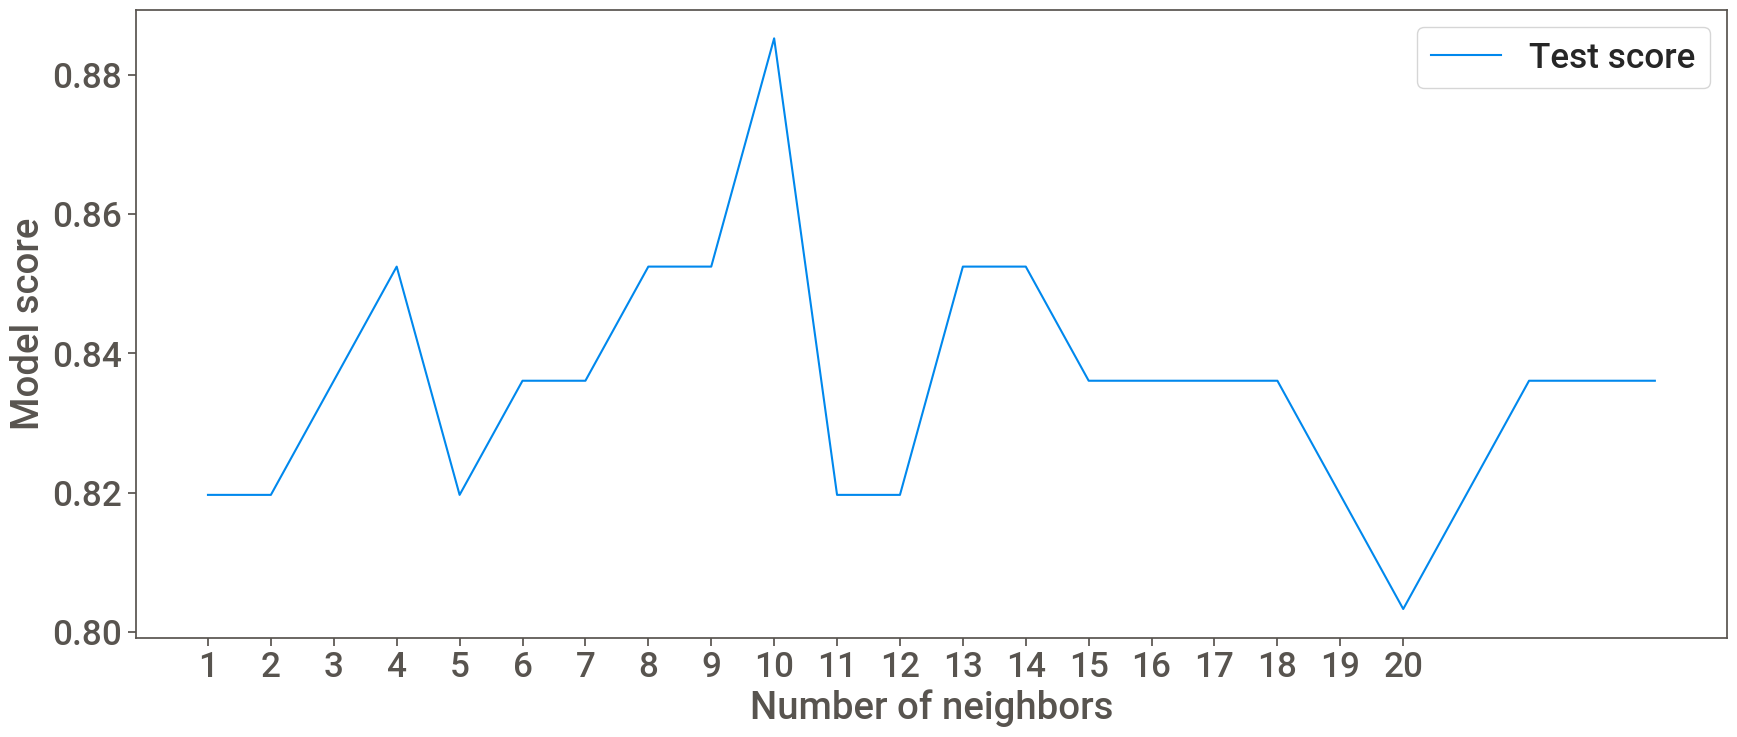

In [54]:
plt.figure(figsize=(18, 8))
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.tight_layout()

# Decision Tree

In [55]:
model_dtc = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confusion matrix")
print(dt_conf_matrix)
print("-------------------------------------------")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,dt_predicted))

confusion matrix
[[23  4]
 [ 7 27]]
-------------------------------------------
Accuracy of DecisionTreeClassifier: 81.9672131147541 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.87      0.79      0.83        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



1. accuracy: (tp + tn)/(tp + tn + fp + fn) 
2. precision: tp/(tp + fp)
3. recall: tp/(tp + fn)
4. f1-score: 2\*precision*recall/(precision + recall)

[0.05063343 0.0268863  0.27026321 0.059719   0.10367657 0.
 0.01862978 0.03600805 0.02042739 0.11805061 0.03684767 0.14613076
 0.11272723]


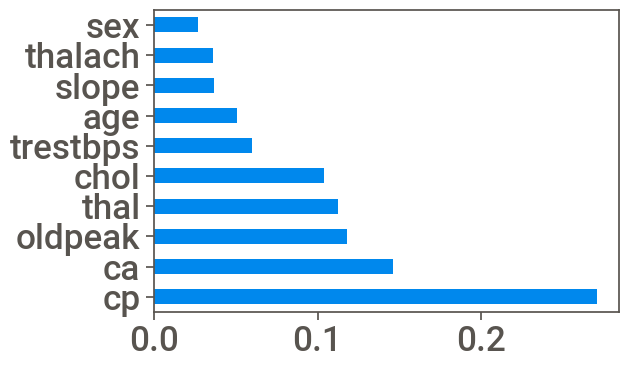

In [56]:
data = df
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
model = DecisionTreeClassifier()
model.fit(X,y)
print(model.feature_importances_) 

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### The KNN model has the best level of accuracy, totaling 89%. 
### However, it is worth saying that the recall of the Logistic Regression model is 91% while  the recall of the KNN model is 88%.
### Therefore,  as in this case it is very important to minimize the number of patients with cardiac condition who are classified as a healthy person, we should consider picking the Logistic Regression model as well.